# Polarity Analysis with TextBlob - Clustering

In part 3.1, TextBlob calculated and returned the polarity of each article's headline and preview as a value between -1 and 1. However, that does not tell me what group (negative, neutral, positive) that each article belongs to, especially for articles with positive headlines and negative previews or vice versa. Therefore, utilizing clustering method, an unsupervised learning method of grouping data, I can put each article into their respective group of sentiment.

## CNBC data

For CNBC dataset, I use the 2 most popular clustering algorithms, K-Means Clustering and Hierarchical clustering, to categorized the sentiments of CNBC articles.

In [1]:
%store -r textblob_df1
X = textblob_df1.iloc[:, -2:].values

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

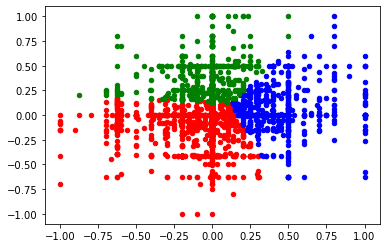

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'red', label = 'C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'C3')

In [4]:
# import scipy.cluster.hierarchy as sch
# d = sch.dendrogram(sch.linkage(X, method = 'ward'))

In [5]:
from sklearn.cluster import AgglomerativeClustering
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc3 = hc3.fit_predict(X)

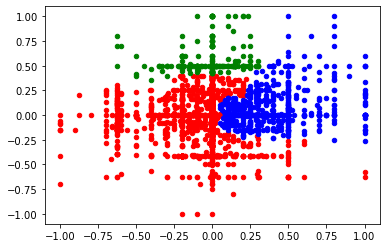

In [6]:
plt.scatter(X[y_hc3 == 0, 0], X[y_hc3 == 0, 1], s = 20, c = 'red', label = 'C1')
plt.scatter(X[y_hc3 == 1, 0], X[y_hc3 == 1, 1], s = 20, c = 'blue', label = 'C2')
plt.scatter(X[y_hc3 == 2, 0], X[y_hc3 == 2, 1], s = 20, c = 'green', label = 'C3')

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_kmeans, y_hc3))
print(accuracy_score(y_kmeans, y_hc3))

[[1505  102    0]
 [  33  509    0]
 [ 328   12  301]]
0.8297491039426523


Assessing both K-Means and Hierarchical clusters, I can see that hierchical clustering method grouped data points that clearly have negative connotation (data points in the lower-left corner) with data points that are in the middle (implying that they have a neutral-positive connotation). Therefore, the favorable clustering model for this data is K-Means Clustering

From the scatter plot, I can conclude that data points colored in red (y=0) represent negative sentiment, data points colored in blue (y=1) represent positive sentiment, and data points colored in green (y=2) represent a mixed sentiment, in which I will assign as neutral.

In [8]:
# reassign the values, which 2, 1, 0 being a positive sentiment, neutral sentiment, and negative sentiment, respectively
c_sentiments = [2 if y == 1 else 1 if y == 2 else 0 for y in y_kmeans]
c_sentiments[0:10]

[2, 0, 1, 0, 2, 0, 0, 0, 0, 0]

In [9]:
# Saving textblob sentiments
%store -r df1
final_df1 = df1
final_df1['tb_sentiment'] = c_sentiments
%store final_df1

Stored 'final_df1' (DataFrame)


# Reuters data

For Reuters data, since my device does not have the memory capacity to run hierchical clustering, I am also using K-Means Clustering for the sentiment scores.

In [10]:
%store -r textblob_df2
X = textblob_df2.iloc[:, -2:].values

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

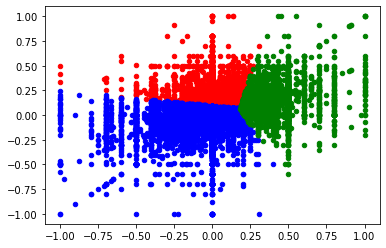

In [12]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'red', label = 'C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'C3')

In [13]:
# The codelines below are for Hierarchical clustering
# hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
# y_hc3 = hc3.fit_predict(X)

In [14]:
# plt.scatter(X[y_hc3 == 0, 0], X[y_hc3 == 0, 1], s = 20, c = 'red', label = 'C1')
# plt.scatter(X[y_hc3 == 1, 0], X[y_hc3 == 1, 1], s = 20, c = 'blue', label = 'C2')
# plt.scatter(X[y_hc3 == 2, 0], X[y_hc3 == 2, 1], s = 20, c = 'green', label = 'C3')

From the scatter plot, I can conclude that data points colored in blue (y=1) represent negative sentiment, data points colored in green (y=2) represent positive sentiment, and data points colored in red (y=0) represent a mixed sentiment, in which I will assign as neutral.

In [15]:
# reassign the values, which 2, 1, 0 being a positive sentiment, neutral sentiment, and negative sentiment, respectively
r_sentiments = [2 if y == 2 else 1 if y == 0 else 0 for y in y_kmeans]
r_sentiments[0:10]

[0, 1, 0, 1, 0, 0, 1, 0, 0, 1]

In [16]:
# Saving textblob sentiments
%store -r df2
final_df2 = df2
final_df2['tb_sentiment'] = r_sentiments
%store final_df2

Stored 'final_df2' (DataFrame)


## The Guardian data

Different from the other 2 datasets, the Guardian data only contains headlines. Therefore, instead of applying a clustering model, I apply a Natural Breaks Optimization to this dataset, specifically Jenks Natural Breaks.

In [17]:
%store -r textblob_df3
X = textblob_df3.iloc[:, -1:].values

c:\users\long's xps13\appdata\local\programs\python\python38\lib\site-packages\jenkspy\core.py:64: UserWarning: Invalid values encountered (NaN or Inf) were ignored
  warnings.warn('Invalid values encountered (NaN or Inf) were ignored')


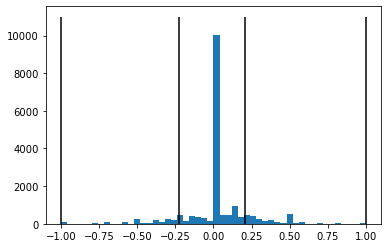

In [18]:
import jenkspy
breaks = jenkspy.jenks_breaks(X, nb_class=3)
plt.hist(X, bins = 50)
for b in breaks:
    plt.vlines(b, ymin=0, ymax=11000)

In [19]:
breaks

[-1.0, -0.22499999999999992, 0.20833333333333334, 1.0]

From the histogram, I can conclude that data points with sentiments below -0.22499999999999992 represent negative sentiment, data points with sentiments above 0.20833333333333334 represent positive sentiment, and data points with sentiments in between those 2 values represent neutral sentiment

In [20]:
g_sentiments = [0 if x <= breaks[1] else 2 if x >= breaks[2] else 1 for x in X]
g_sentiments[0:10]

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1]

In [21]:
# Saving textblob sentiments
%store -r df3
final_df3 = df3
final_df3['tb_sentiment'] = g_sentiments
%store final_df3

Stored 'final_df3' (DataFrame)
